In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import math
from scipy.optimize import fsolve
from IPython.display import display


In [ ]:
dateformat = "%m/%d/%Y"
last_coupon_date = datetime.strptime('9/1/2023',dateformat)
bonds = [
    ['coupon rate','maturity', '01/08/2024', '01/09/2024', '01/10/2024', '01/11/2024', '01/12/2024', '01/15/2024','01/16/2024','01/17/2024','01/18/2024','01/19/2024'],
    [2.25, '3/1/2024', 99.63, 99.64, 99.65, 99.661, 99.67, 99.687, 99.68, 99.683, 99.708, 99.72],
    [1.5, '9/1/2024', 97.96, 97.98, 97.985, 97.982, 98.021, 98.054, 97.974, 97.975, 97.999, 98.007],
    [1.25, '3/1/2025', 96.46, 96.482, 96.552, 96.576, 96.661, 96.715, 96.54, 96.448, 96.495, 96.46],
    [0.5, '9/1/2025', 94.34, 94.37, 94.38, 94.43, 94.49, 94.49, 94.42, 94.25, 94.24, 94.22],
    [0.25, '3/1/2026', 92.862, 92.86, 92.844, 92.856, 93.023, 93.008, 92.796, 92.57, 92.546, 92.545],
    [1.0, '9/1/2026', 93.46, 93.44, 93.55, 93.53, 93.6, 93.57, 93.4, 93.12, 93.08, 93.07],
    [1.25, '3/1/2027', 93.282, 93.301, 93.245, 93.186, 93.467, 93.493, 93.141, 92.856, 92.753, 92.764],
    [2.75, '9/1/2027', 97.58, 97.591, 97.603, 97.52, 97.74, 97.772, 97.441, 97.092, 96.956, 96.947],
    [3.5, '3/1/2028', 100.5, 100.48, 100.439, 100.328, 100.637, 100.673, 100.22, 99.834, 99.662, 99.623],
    [3.25, '9/1/2028', 99.74, 99.72, 99.72, 99.55, 99.88, 99.91, 99.44, 98.99, 98.81, 98.77],
    [4.0, '3/1/2029', 103.406, 103.38, 103.279, 103.132, 103.542, 103.552, 102.974, 102.483, 102.279, 102.242]
]

#calculate dirty price
for i in range(10):
  today = datetime.strptime(bonds[0][2+i], dateformat)
  diff = today - last_coupon_date
  diff = diff.days
  for j in range(len(bonds)-1):
    accured_interest = diff / 365 * bonds[j+1][0]
    bonds[j+1][i+2] = bonds[j+1][i+2] + accured_interest

dirty_price = pd.DataFrame(bonds[1:], columns=bonds[0])
bond_names = ['CAN 2.25 Mar 24', 'CAN 1.5 Sep 24', 'CAN 1.25 Mar 25', 'CAN 0.5 Sep 25', 'CAN 0.25 Mar 26', 'CAN 1 Sep 26', 'CAN 1.25 Mar 27', 'CAN 2.75 Sep 27', 'CAN 3.5 Mar 28', 'CAN 3.25 Sep 28', 'CAN 4 Mar 29']
dirty_price.index = bond_names
print(dirty_price)


# YTM Curve
$PV = C*\sum_{t=1}^{n}e^{-r*t} + F*e^{-r*n}$

In [127]:
def calculate_r_YTM(PV, C, F, n, initial_guess, current_date, maturity_date):

  def equation(r):
    discount_coupon = 0
    for i in range(n-1):
      t_n = (maturity_date - current_date).days / 365 - 0.5 * (i+1)
      discount_coupon += C*np.exp(-r[0]*t_n)

    total = discount_coupon + F * np.exp(-r[0]*(maturity_date - current_date).days/365)
    diff = PV - total
    return diff

  r = fsolve(equation, initial_guess)

  return r[0]

date_list = ['01/08/2024', '01/09/2024', '01/10/2024', '01/11/2024', '01/12/2024', '01/15/2024','01/16/2024','01/17/2024','01/18/2024','01/19/2024']
ytm = dirty_price[date_list].copy()
for t in range(len(date_list)):
  for i in range(11):
    today_price = dirty_price[['coupon rate','maturity',date_list[t]]]
    PV = today_price[date_list[t]][i]
    C = today_price['coupon rate'][i]/2
    F = 100 + C
    n = i + 1
    current_date = datetime.strptime(date_list[t], '%m/%d/%Y')
    maturity_date = datetime.strptime(today_price['maturity'][i], '%m/%d/%Y')
    #print(PV, C, F, n, current_date, maturity_date)
    ytm[date_list[t]][i] = calculate_r_YTM(PV, C, F, n, 0.05, current_date, maturity_date)

print(ytm)

                 01/08/2024  01/09/2024  01/10/2024  01/11/2024  01/12/2024  \
CAN 2.25 Mar 24    0.047823    0.047613    0.047395    0.047095    0.046932   
CAN 1.5 Sep 24     0.046629    0.046447    0.046501    0.046683    0.046195   
CAN 1.25 Mar 25    0.044063    0.043938    0.043375    0.043230    0.042525   
CAN 0.5 Sep 25     0.040411    0.040276    0.040270    0.040005    0.039675   
CAN 0.25 Mar 26    0.037093    0.037147    0.037272    0.037256    0.036457   
CAN 1 Sep 26       0.035770    0.035878    0.035455    0.035563    0.035302   
CAN 1.25 Mar 27    0.034948    0.034901    0.035115    0.035340    0.034382   
CAN 2.75 Sep 27    0.034291    0.034263    0.034233    0.034482    0.033841   
CAN 3.5 Mar 28     0.033398    0.033448    0.033552    0.033836    0.033044   
CAN 3.25 Sep 28    0.032789    0.032836    0.032836    0.033229    0.032468   
CAN 4 Mar 29       0.032473    0.032523    0.032727    0.033026    0.032180   

                 01/15/2024  01/16/2024  01/17/2024

# YTM Yearly

In [ ]:
date_list = ['01/08/2024', '01/09/2024', '01/10/2024', '01/11/2024', '01/12/2024', '01/15/2024','01/16/2024','01/17/2024','01/18/2024','01/19/2024']
interpo = [date_list]
for k in range(5):
  yearly = []
  for i in range(len(ytm.columns)):
    current_date = datetime.strptime(date_list[i], '%m/%d/%Y')
    t = current_date + relativedelta(years=k+1)
    #print(dirty_price['maturity'][1+k])

    t_1 = datetime.strptime(dirty_price['maturity'][1+2*k], '%m/%d/%Y')
    t_2 = datetime.strptime(dirty_price['maturity'][2+2*k], '%m/%d/%Y')
    year_one_rate = (t_2 - t).days / (t_2 - t_1).days * ytm[date_list[i]][1+2*k] + (t - t_1).days / (t_2 - t_1).days * ytm[date_list[i]][2+2*k]
    #print(t_1, t, t_2,spot_curve[date_list[i]][1], spot_curve[date_list[i]][2])
    yearly.append(year_one_rate)
  #print('for year',k+1)
  #print(yearly)
  interpo.append(yearly)

ytm_yearly = pd.DataFrame(interpo[1:], columns=interpo[0])
yearly_indexs=['Year 1', 'Year 2','Year 3','Year 4','Year 5']
ytm_yearly.index = yearly_indexs
print(ytm_yearly)

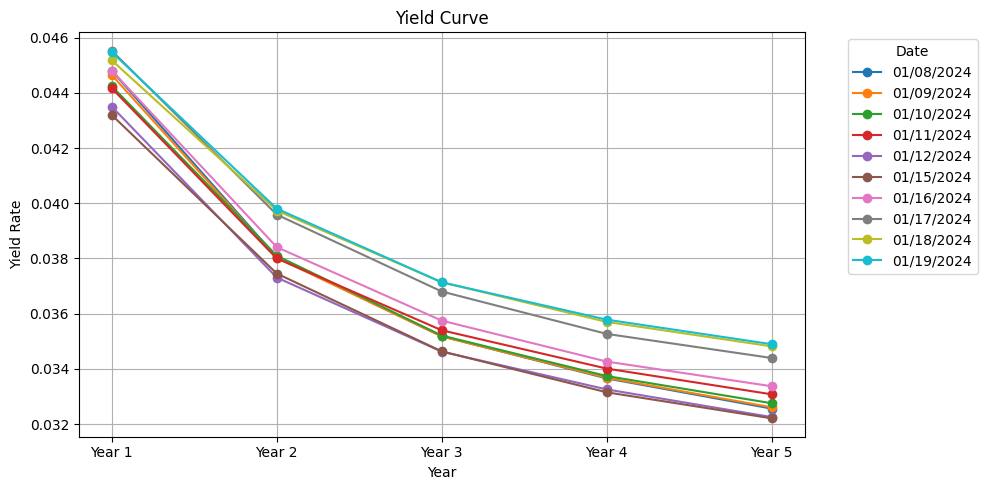

In [207]:
plt.figure(figsize=(10, 5))
for column in ytm_yearly.columns:
    plt.plot(ytm_yearly.index, ytm_yearly[column], marker='o', label=column)

plt.xlabel('Year')
plt.ylabel('Yield Rate')
plt.title('Yield Curve')
plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Spot Curve

In [167]:
def calculate_r_spot(PV, C, F, n, initial_guess, current_date, maturity_date, r_pre):

  def equation(r):
    discount_coupon = 0
    for i in range(n-1):
      t_n = (maturity_date - current_date).days / 365 - 0.5 * (i+1)
      discount_coupon += C*np.exp(-r_pre[i]*t_n)

      #print(r_pre[i],t_n*365)

    total = discount_coupon + F * np.exp(-r[0]*((maturity_date - current_date).days/365))
    diff = PV - total
    return diff

  r = fsolve(equation, initial_guess)

  return r[0]

date_list = ['01/08/2024', '01/09/2024', '01/10/2024', '01/11/2024', '01/12/2024', '01/15/2024','01/16/2024','01/17/2024','01/18/2024','01/19/2024']
spot_curve = dirty_price[date_list].copy()
for t in range(len(date_list)):
  r_pre = []
  for i in range(11):
    today_price = dirty_price[['coupon rate','maturity',date_list[t]]]
    PV = today_price[date_list[t]][i]
    C = today_price['coupon rate'][i]/2
    F = 100 + C
    n = i + 1
    current_date = datetime.strptime(date_list[t], '%m/%d/%Y')
    maturity_date = datetime.strptime(today_price['maturity'][i], '%m/%d/%Y')
    spot_curve[date_list[t]][i] = calculate_r_spot(PV, C, F, n, 0.05, current_date, maturity_date, r_pre)
    r_pre.append(ytm[date_list[t]][i])
print(spot_curve)


                 01/08/2024  01/09/2024  01/10/2024  01/11/2024  01/12/2024  \
CAN 2.25 Mar 24    0.047823    0.047613    0.047395    0.047095    0.046932   
CAN 1.5 Sep 24     0.046627    0.046445    0.046499    0.046682    0.046194   
CAN 1.25 Mar 25    0.044048    0.043923    0.043358    0.043213    0.042507   
CAN 0.5 Sep 25     0.040391    0.040256    0.040251    0.039985    0.039655   
CAN 0.25 Mar 26    0.037073    0.037128    0.037253    0.037237    0.036437   
CAN 1 Sep 26       0.035661    0.035773    0.035347    0.035457    0.035198   
CAN 1.25 Mar 27    0.034783    0.034738    0.034958    0.035188    0.034222   
CAN 2.75 Sep 27    0.033871    0.033848    0.033824    0.034088    0.033439   
CAN 3.5 Mar 28     0.032774    0.032835    0.032956    0.033263    0.032452   
CAN 3.25 Sep 28    0.032137    0.032194    0.032204    0.032627    0.031848   
CAN 4 Mar 29       0.031609    0.031672    0.031907    0.032237    0.031360   

                 01/15/2024  01/16/2024  01/17/2024

# Spot Curve Yearly

In [ ]:
date_list = ['01/08/2024', '01/09/2024', '01/10/2024', '01/11/2024', '01/12/2024', '01/15/2024','01/16/2024','01/17/2024','01/18/2024','01/19/2024']
interpo = [date_list]
for k in range(5):
  yearly = []
  for i in range(len(spot_curve.columns)):
    current_date = datetime.strptime(date_list[i], '%m/%d/%Y')
    t = current_date + relativedelta(years=k+1)
    #print(dirty_price['maturity'][1+k])

    t_1 = datetime.strptime(dirty_price['maturity'][1+2*k], '%m/%d/%Y')
    t_2 = datetime.strptime(dirty_price['maturity'][2+2*k], '%m/%d/%Y')
    year_one_rate = (t_2 - t).days / (t_2 - t_1).days * spot_curve[date_list[i]][1+2*k] + (t - t_1).days / (t_2 - t_1).days * spot_curve[date_list[i]][2+2*k]
    #print(t_1, t, t_2,spot_curve[date_list[i]][1], spot_curve[date_list[i]][2])
    yearly.append(year_one_rate)
  #print('for year',k+1)
  #print(yearly)
  interpo.append(yearly)

spot_yearly = pd.DataFrame(interpo[1:], columns=interpo[0])
yearly_indexs=['Year 1', 'Year 2','Year 3','Year 4','Year 5']
spot_yearly.index = yearly_indexs
print(spot_yearly)


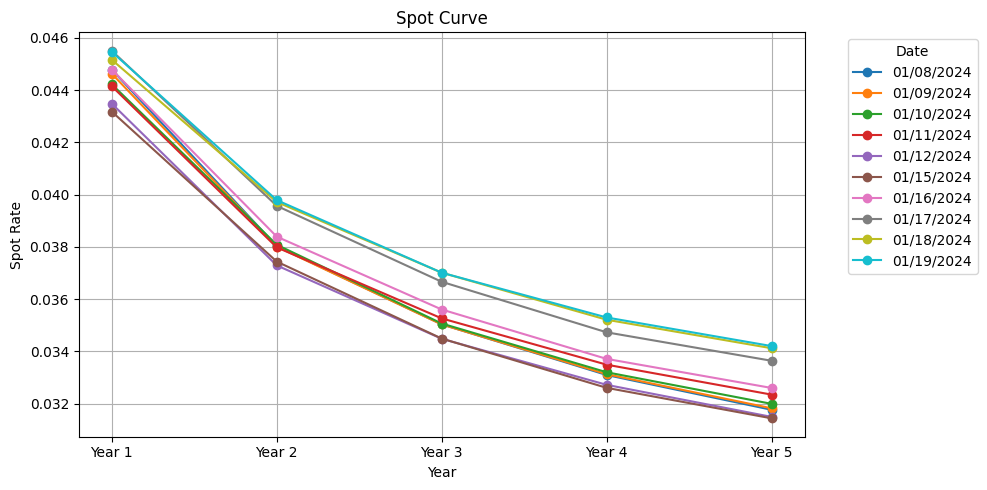

In [208]:
plt.figure(figsize=(10, 5))
for column in spot_yearly.columns:
    plt.plot(spot_yearly.index, spot_yearly[column], marker='o', label=column)

plt.xlabel('Year')
plt.ylabel('Spot Rate')
plt.title('Spot Curve')
plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Forward Rate

In [178]:
forward = [date_list]
for k in range(4):
  yearly = []
  for i in range(len(spot_curve.columns)):
    t = 1
    n = k + 1
    S_t_n = spot_yearly[date_list[i]][n]
    S_t = spot_yearly[date_list[i]][0]
    F = ((1 + S_t_n)**(2 * (t + n)) / (1 + S_t)**(2 * t))**(1 / (2 * n)) - 1
    #print(t, n, S_t_n, S_t, F)
    yearly.append(F)
  forward.append(yearly)
forward_yearly = pd.DataFrame(forward[1:],columns=forward[0])
yearly_indexs=['1yr - 1yr', '1yr - 2yr','1yr - 3yr','1yr - 4yr']
forward_yearly.index = yearly_indexs
print(forward_yearly)

           01/08/2024  01/09/2024  01/10/2024  01/11/2024  01/12/2024  \
1yr - 1yr    0.031308    0.031427    0.031973    0.031847    0.031134   
1yr - 2yr    0.030193    0.030260    0.030515    0.030844    0.030009   
1yr - 3yr    0.029225    0.029317    0.029550    0.029959    0.029153   
1yr - 4yr    0.028529    0.028640    0.028952    0.029411    0.028513   

           01/15/2024  01/16/2024  01/17/2024  01/18/2024  01/19/2024  
1yr - 1yr    0.031725    0.032033    0.033665    0.034301    0.034143  
1yr - 2yr    0.030171    0.031039    0.032267    0.032959    0.032808  
1yr - 3yr    0.029100    0.030044    0.031159    0.031913    0.031928  
1yr - 4yr    0.028519    0.029572    0.030692    0.031375    0.031403  


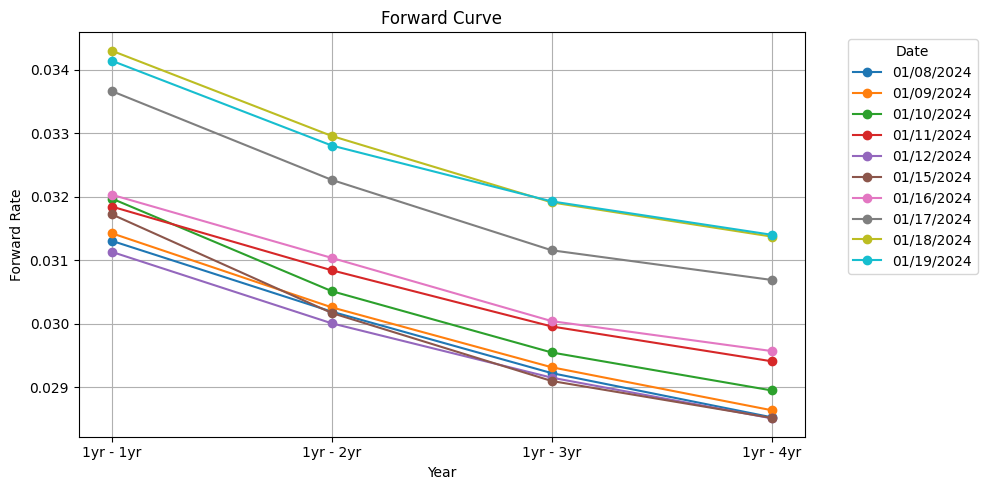

In [209]:
plt.figure(figsize=(10, 5))
for column in forward_yearly.columns:
    plt.plot(forward_yearly.index, forward_yearly[column], marker='o', label=column)

plt.xlabel('Year')
plt.ylabel('Forward Rate')
plt.title('Forward Curve')
plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Covariance Matrix for YTM and Forward

In [214]:
ytm_X = np.zeros((5,9))
year = ytm_yearly.index
daily = ytm_yearly.columns
for i in range(5):
  for j in range(9):
    ytm_X[i][j] = math.log(ytm_yearly[daily[j+1]][year[i]]/ytm_yearly[daily[j]][year[i]])

ytm_cov= np.cov(ytm_X)
print(ytm_cov)

forward_X = np.zeros((4,9))
year = forward_yearly.index
daily = forward_yearly.columns
for i in range(4):
  for j in range(9):
    forward_X[i][j] = math.log(forward_yearly[daily[j+1]][year[i]]/forward_yearly[daily[j]][year[i]])

forward_cov= np.cov(forward_X)
print(forward_cov)

[[0.00025574 0.00019386 0.00022226 0.00022689 0.0002393 ]
 [0.00019386 0.00021226 0.00022889 0.00022802 0.00024316]
 [0.00022226 0.00022889 0.00026544 0.00027059 0.00028867]
 [0.00022689 0.00022802 0.00027059 0.00027966 0.00029765]
 [0.0002393  0.00024316 0.00028867 0.00029765 0.00031851]]
[[0.00041144 0.00033183 0.00029873 0.00031583]
 [0.00033183 0.00037338 0.00037087 0.00039596]
 [0.00029873 0.00037087 0.00038218 0.00040678]
 [0.00031583 0.00039596 0.00040678 0.00043739]]


# Eigenvalue and Eigenvector of YTM and Forward

In [216]:
ytm_eigenvalues, ytm_eigenvectors = np.linalg.eig(ytm_cov)
print("Eigenvalues:", ytm_eigenvalues)
print("Eigenvectors:", ytm_eigenvectors)
print(ytm_eigenvalues[0]/sum(ytm_eigenvalues))

Eigenvalues: [1.25117116e-03 5.93672625e-05 1.96731357e-05 7.58256784e-07
 6.44520700e-07]
Eigenvectors: [[ 4.06129613e-01  9.11179590e-01  6.31399657e-02  2.86911594e-02
  -8.09030564e-04]
 [ 3.96256292e-01 -1.18474463e-01 -8.70981562e-01  7.73436621e-02
   2.53680567e-01]
 [ 4.58204737e-01 -1.94566941e-01 -2.89742530e-02 -2.66388293e-01
  -8.24857499e-01]
 [ 4.68294330e-01 -2.11925384e-01  3.32044930e-01 -6.15145194e-01
   4.97122326e-01]
 [ 4.98787057e-01 -2.70086827e-01  3.55402758e-01  7.37447248e-01
   9.01388622e-02]]
0.9395897344582727


In [215]:
forward_eigenvalues, forward_eigenvectors = np.linalg.eig(forward_cov)
print("Eigenvalues:", forward_eigenvalues)
print("Eigenvectors:", forward_eigenvectors)
print(forward_eigenvalues[0]/sum(forward_eigenvalues))

Eigenvalues: [1.46475700e-03 1.35422199e-04 2.17540760e-06 2.03177460e-06]
Eigenvectors: [[-0.46036696 -0.86319875 -0.20715027  0.00624032]
 [-0.50343931  0.06211959  0.86105573  0.03567994]
 [-0.49996921  0.32965283 -0.28509149 -0.74838669]
 [-0.53351843  0.3773037  -0.36659875  0.66227287]]
0.9129702281853935
